## Live plot of Nvidia GPU utilization 

Inspired by [Jimmie Goode](http://jimgoo.com/buffered-gens/)

In [3]:
%matplotlib inline

import time
import datetime
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from collections import OrderedDict

from pynvml import (nvmlInit,
                     nvmlDeviceGetCount, 
                     nvmlDeviceGetHandleByIndex, 
                     nvmlDeviceGetUtilizationRates,
                     nvmlDeviceGetName)

In [4]:
def gpu_info():
    "Returns a tuple of (GPU ID, GPU Description, GPU % Utilization)"
    nvmlInit()
    deviceCount = nvmlDeviceGetCount()
    info = []
    for i in range(0, deviceCount): 
        handle = nvmlDeviceGetHandleByIndex(i) 
        util = nvmlDeviceGetUtilizationRates(handle)
        desc = nvmlDeviceGetName(handle) 
        info.append((i, desc, util.gpu)) #['GPU %i - %s' % (i, desc)] = util.gpu
    return info

In [ ]:
utils = []
while True:
    try:
        dt = datetime.datetime.now()
        util = gpu_info()
        utils.append([dt] + [x[2] for x in util])
#         # Don't plot anything on the first pass
#         if len(utils) == 1:
#             continue
#         df = pd.DataFrame(utils, columns=['dt'] + 
#                           ['GPU %i - %s' % (x[0], x[1]) for x in util]).set_index('dt')
#         ax = df.plot();
#         vals = ax.get_yticks();
#         #ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
#         ax.set_ylabel('GPU Utilization');
#         ax.set_xlabel('Time');
#         ax.set_ylim([0, 100])
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
        time.sleep(.1)
    except KeyboardInterrupt:
        break

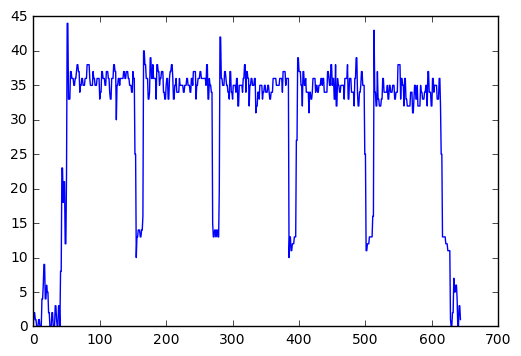

In [24]:
# multiprocessing 7 process, 32 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 11s - loss: 1.1568 - acc: 0.5881 - val_loss: 1.0848 - val_acc: 0.6166
# CPU times: user 1min 33s, sys: 9.22 s, total: 1min 43s
# Wall time: 59.6 s
plt.plot([u[1] for u in utils])

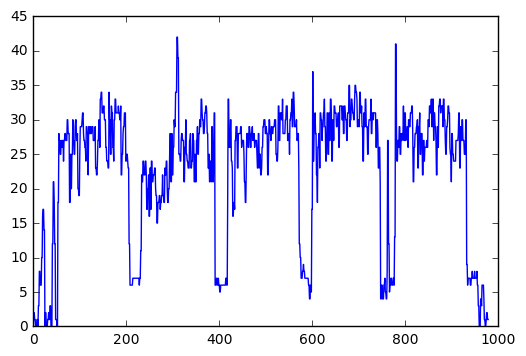

In [26]:
# single thread, 32 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 17s - loss: 1.1819 - acc: 0.5795 - val_loss: 1.0329 - val_acc: 0.6359
# CPU times: user 2min 44s, sys: 9.61 s, total: 2min 54s
# Wall time: 1min 32s
plt.plot([u[1] for u in utils])

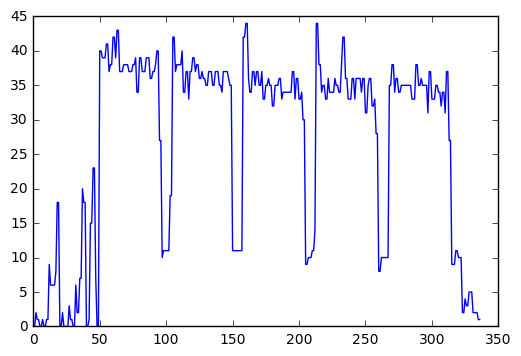

In [30]:
# multiprocessing 7 process, 128 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 5s - loss: 1.1685 - acc: 0.5837 - val_loss: 1.0572 - val_acc: 0.6308
# CPU times: user 43 s, sys: 4.88 s, total: 47.9 s
# Wall time: 29.6 s
plt.plot([u[1] for u in utils])

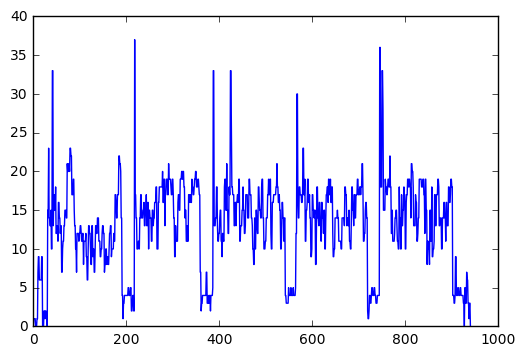

In [28]:
# single thread, 128 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 18s - loss: 1.1787 - acc: 0.5811 - val_loss: 1.1588 - val_acc: 0.5969
# CPU times: user 2min 1s, sys: 5.08 s, total: 2min 6s
# Wall time: 1min 30s
plt.plot([u[1] for u in utils])

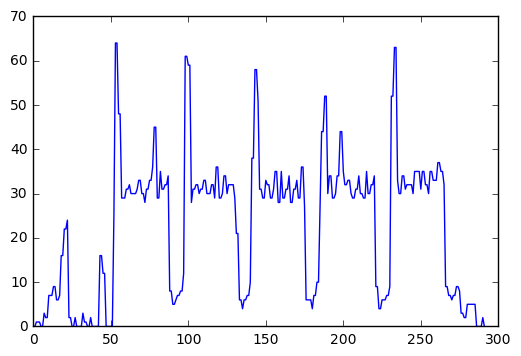

In [32]:
# multiprocessing 7 process, 512 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 4s - loss: 1.2569 - acc: 0.5482 - val_loss: 1.2016 - val_acc: 0.5716
# CPU times: user 27 s, sys: 3.15 s, total: 30.1 s
# Wall time: 24.5 s
plt.plot([u[1] for u in utils])

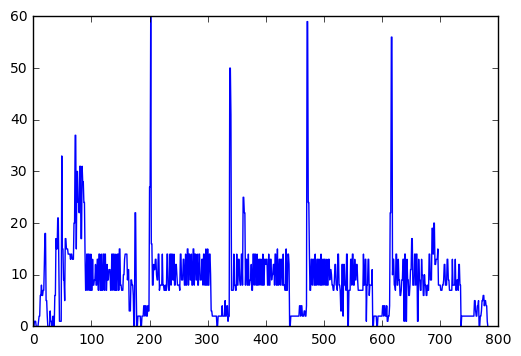

In [34]:
# single thread, 512 batch size
plt.plot([u[1] for u in utils])

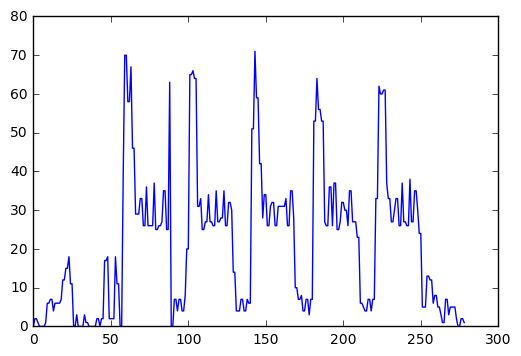

In [36]:
# multiprocessing 7 process, 1024 batch size
# Epoch 5/5
# 50000/50000 [==============================] - 4s - loss: 1.2890 - acc: 0.5388 - val_loss: 1.7425 - val_acc: 0.4104
# CPU times: user 24.6 s, sys: 2.92 s, total: 27.5 s
# Wall time: 23 s
plt.plot([u[1] for u in utils])

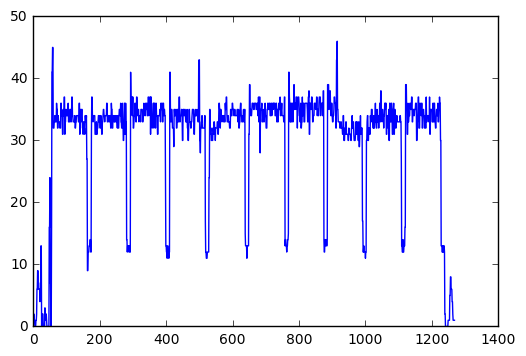

In [38]:
# Epoch 10/10
# 50000/50000 [==============================] - 11s - loss: 1.1219 - acc: 0.6071 - val_loss: 0.9875 - val_acc: 0.6562
# CPU times: user 3min 9s, sys: 18.7 s, total: 3min 28s
# Wall time: 2min
plt.plot([u[1] for u in utils])

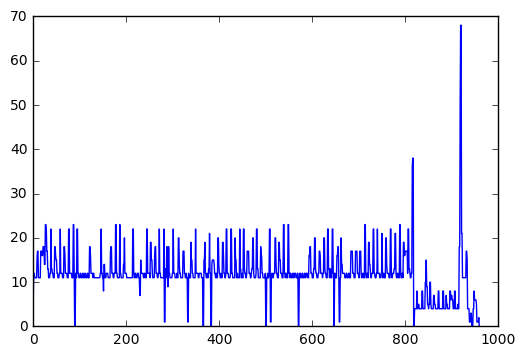

In [40]:
plt.plot([u[1] for u in utils])

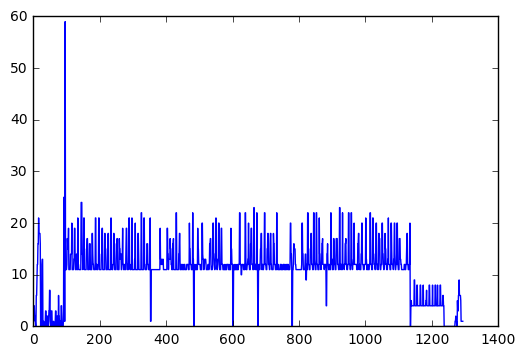

In [42]:
plt.plot([u[1] for u in utils])

In [ ]:
ax = df.plot();
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
ax.set_ylabel('GPU Utilization');
ax.set_xlabel('Time');